## Import necessary libraries

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

## Loading the dataset

In [3]:
# Step 1: Load the Dataset
df = pd.read_csv("C:\\Users\\pc\\Documents\\azubi\\cleaned dataset\\bank-full.csv")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Exploratory Data Analysis (EDA)

In [6]:
# Check for missing values in each column
print("Missing values:\n", df.isnull().sum())

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Show frequency distributions for categorical columns to understand their distribution
print("Categorical distributions:")
for col in ['job', 'marital', 'education', 'contact', 'month']:
    print(f"{col}:\n", df[col].value_counts(normalize=True))

Categorical distributions:
job:
 job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: proportion, dtype: float64
marital:
 marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64
education:
 education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64
contact:
 contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtype: float64
month:
 month
may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: proportion, dtype: float64


In [8]:
# Check class imbalance in the target variable 'y' (yes/no for subscription)
print("Class imbalance:\n", df['y'].value_counts(normalize=True))

Class imbalance:
 y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


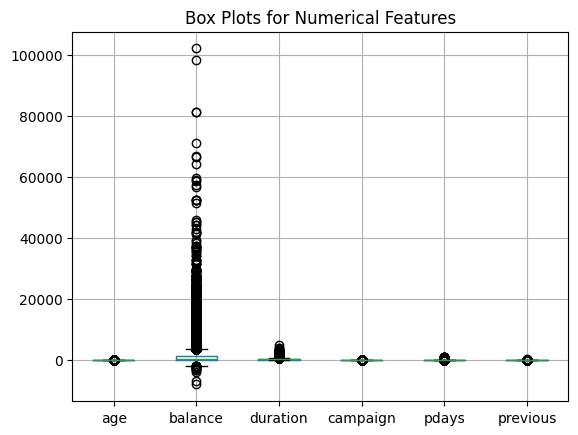

In [9]:
# Visualize outliers in numerical features using box plots
df.boxplot(column=['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'])
plt.title("Box Plots for Numerical Features")
plt.show()

In [10]:
# Calculate point-biserial correlation between numerical features and binary target
print("Correlations with target:")
for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    corr, _ = pointbiserialr(df[col], df['y'].map({'yes': 1, 'no': 0}))
    print(f"{col}: {corr}")

Correlations with target:
age: 0.025155017088380888
balance: 0.0528384102881829
duration: 0.39452101589456207
campaign: -0.07317200634586687
pdays: 0.10362149401628687
previous: 0.09323577278887688


In [11]:
# Perform chi-square tests to assess association between categorical features and target
print("Chi-square tests:")
for col in ['job', 'marital', 'education', 'contact', 'month']:
    contingency_table = pd.crosstab(df[col], df['y'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{col} p-value: {p}")

Chi-square tests:
job p-value: 3.337121944935502e-172
marital p-value: 2.1450999986791792e-43
education p-value: 1.6266562124072994e-51
contact p-value: 1.251738325340638e-225
month p-value: 0.0


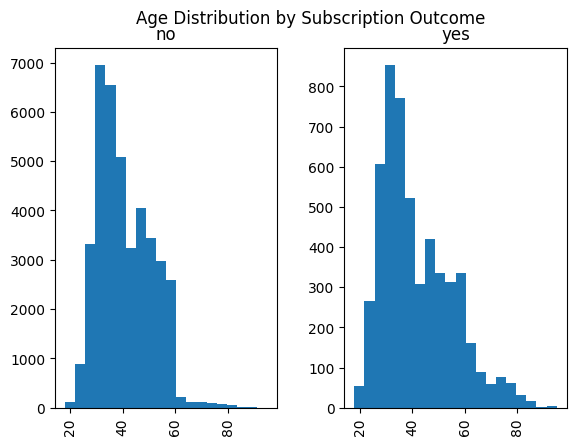

In [12]:
# Visualize age distribution by subscription outcome
df.hist(column='age', by='y', bins=20)
plt.suptitle("Age Distribution by Subscription Outcome")
plt.show()


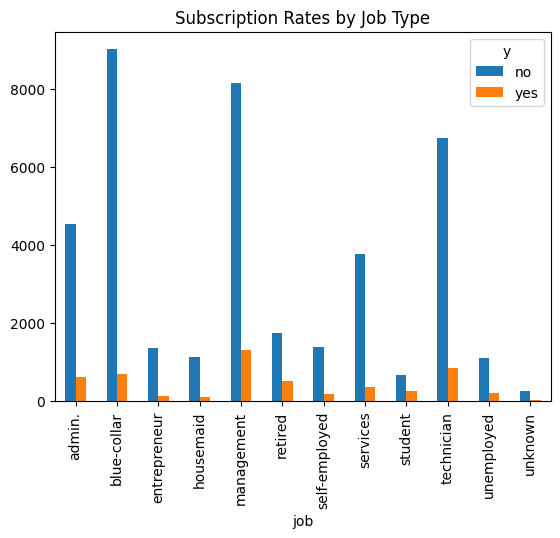

In [13]:
# Visualize subscription rates by job type
pd.crosstab(df['job'], df['y']).plot(kind='bar')
plt.title("Subscription Rates by Job Type")
plt.show()

# Feature Engineering

In [63]:
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month'], drop_first=True)

# Create new features to capture additional patterns
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[0, 30, 45, 60, 120], labels=['18-30', '31-45', '46-60', '61+'])
df_encoded['balance_category'] = pd.cut(df_encoded['balance'], bins=[-10000, 0, 1000, 10000], labels=['low', 'medium', 'high'])
df_encoded['total_contacts'] = df_encoded['campaign'] + df_encoded['previous']
df_encoded['last_contact_category'] = df_encoded['pdays'].apply(lambda x: 'none' if x == -1 else ('recent' if x <= 30 else 'distant'))

# Scale numerical features to standardize their range
scaler = StandardScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Build a Predictive Model

In [64]:
# Prepare features and target
X = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
y = df['y'].map({'no':0,'yes':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=1, test_size=0.2)
# Define models
models = {
    'Logistic': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced',
random_state=1),
    'RandomForest': RandomForestClassifier(n_estimators=100,
class_weight='balanced', random_state=1),
    'GradBoost': GradientBoostingClassifier(random_state=1)
}


# Model trainning and Performance Evaluation

In [52]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, target_names=['no','yes']))

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Accuracy: 0.8391020678978215
              precision    recall  f1-score   support

          no       0.97      0.84      0.90      7985
         yes       0.41      0.82      0.54      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.72      9043
weighted avg       0.91      0.84      0.86      9043

DecisionTree Accuracy: 0.8736038925135464
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7985
         yes       0.46      0.44      0.45      1058

    accuracy                           0.87      9043
   macro avg       0.69      0.68      0.69      9043
weighted avg       0.87      0.87      0.87      9043

RandomForest Accuracy: 0.9011390025434037
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7985
         yes       0.66      0.32      0.43      1058

    accuracy                           0.90      9043
   mac